In [157]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
import os
os.chdir('C:/Users/82109/Dropbox/내 PC (DESKTOP-NND5VU7)/Desktop/bigcon')

In [3]:
df = pd.read_excel('All data.xlsx')

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35378 entries, 0 to 35377
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   상품군           35378 non-null  object 
 1   상품소분류         35378 non-null  object 
 2   브랜드명          35378 non-null  object 
 3   판매단가          35378 non-null  int64  
 4   취급액           35378 non-null  int64  
 5   판매수량          35378 non-null  float64
 6   방송시간대         35378 non-null  int64  
 7   방송분대          35378 non-null  int64  
 8   요일            35378 non-null  object 
 9   노출시간          35378 non-null  int64  
 10  최대시청률         35378 non-null  float64
 11  조기마감여부        35378 non-null  int64  
 12  월             35378 non-null  int64  
 13  계절            35378 non-null  object 
 14  시간대           35378 non-null  object 
 15  판매수량시간등급수능    35378 non-null  object 
 16  판매수량시간등급사분위수  35378 non-null  object 
 17  노출빈도여부        35378 non-null  int64  
 18  디테일여부         35378 non-nu

In [149]:
df.head()

,상품군,상품소분류,브랜드명,판매단가,취급액,판매수량,방송시간대,방송분대,요일,노출시간,...,월,계절,시간대,판매수량시간등급수능,판매수량시간등급사분위수,노출빈도여부,디테일여부,평균기온,단가_cluster,판매단가_Range
0,의류,상의,테이트,39900,2099000,52.606516,6,0,화요일,20,...,1,겨울,오전,B,B,0,0,-3.70,0,1
1,의류,상의,테이트,39900,4371000,109.548872,6,0,화요일,20,...,1,겨울,오전,B,B,0,0,-3.70,0,1
2,의류,상의,테이트,39900,3262000,81.754386,6,20,화요일,20,...,1,겨울,오전,B,B,0,0,-3.71,0,1
3,의류,상의,테이트,39900,6955000,174.310777,6,20,화요일,20,...,1,겨울,오전,B,B,0,0,-3.71,0,1
4,의류,상의,테이트,39900,6672000,167.218045,6,40,화요일,20,...,1,겨울,오전,B,B,0,1,-3.71,0,1


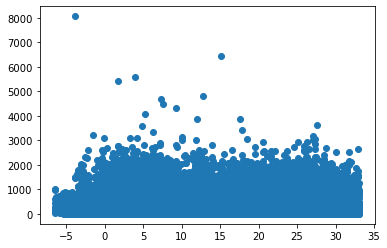

In [161]:
plt.scatter(df['평균기온'],df['판매수량'])

<AxesSubplot:xlabel='평균기온'>

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44512 missing from cur

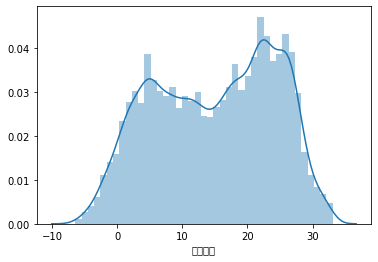

In [162]:
sns.distplot(df['평균기온'])

<AxesSubplot:xlabel='판매수량'>

C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\82109\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 47588 missing from cur

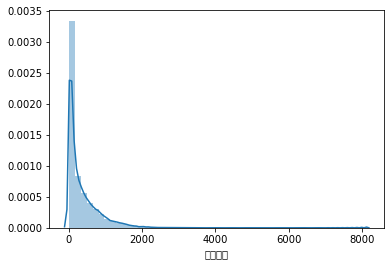

In [172]:
sns.distplot(df['판매수량'])

In [74]:
cl = df[['판매단가']]
cl.shape

(35378, 1)

In [75]:
cl.describe()

,판매단가
count,3.537800e+04
mean,3.878541e+05
std,6.264218e+05
min,1.280000e+04
25%,5.900000e+04
50%,9.900000e+04
75%,3.990000e+05
max,7.930000e+06


In [41]:
cl['단가_scale'] = (cl['판매단가'] - min(cl['판매단가']))/(max(cl['판매단가']) - min(cl['판매단가']))

<ipython-input-41-aeb7fd9c6d6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['단가_scale'] = (cl['판매단가'] - min(cl['판매단가']))/(max(cl['판매단가']) - min(cl['판매단가']))


In [45]:
cl['취급액_scale'] = (cl['취급액'] - min(cl['취급액']))/(max(cl['취급액']) - min(cl['취급액']))

<ipython-input-45-26c4cccd4d51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl['취급액_scale'] = (cl['취급액'] - min(cl['취급액']))/(max(cl['취급액']) - min(cl['취급액']))


In [66]:
sc = StandardScaler()

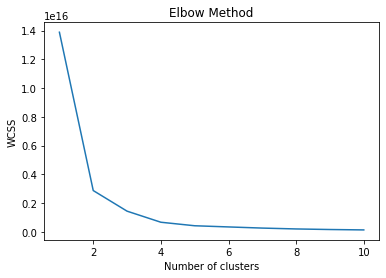

In [76]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(cl)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [142]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(cl)

In [143]:
df['단가_cluster'] = pred_y

In [126]:
min(df['판매단가'][df['단가_cluster'] == 1])

1059000

In [144]:
df.groupby('단가_cluster')['취급액'].mean()

단가_cluster
0    2.836517e+07
1    1.906573e+07
2    1.629172e+07
3    1.551886e+07
4    1.680905e+07
5    1.638953e+07
Name: 취급액, dtype: float64

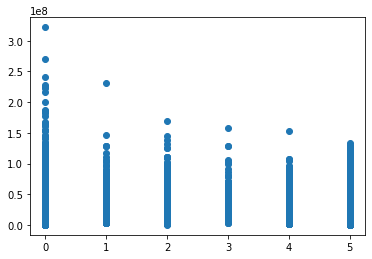

In [145]:
plt.scatter(df['단가_cluster'], df['취급액'])

In [115]:
df['판매단가'].describe()

count    3.537800e+04
mean     3.878541e+05
std      6.264218e+05
min      1.280000e+04
25%      5.900000e+04
50%      9.900000e+04
75%      3.990000e+05
max      7.930000e+06
Name: 판매단가, dtype: float64

In [137]:
conditionlist = [
    (df['판매단가'] <= 59000) ,
    (df['판매단가'] > 59000) & (df['판매단가'] <=99000),
    (df['판매단가'] > 99000) & (df['판매단가'] <=399000),
    (df['판매단가'] > 399000)]
choicelist = ['1','2','3','4']
df['판매단가_Range'] = np.select(conditionlist, choicelist, default='Not Specified')

In [140]:
df = df.astype({'판매단가_Range': 'int'})

In [153]:
df

,상품군,상품소분류,브랜드명,판매단가,취급액,판매수량,방송시간대,방송분대,요일,노출시간,...,월,계절,시간대,판매수량시간등급수능,판매수량시간등급사분위수,노출빈도여부,디테일여부,평균기온,단가_cluster,판매단가_Range
0,의류,상의,테이트,39900,2099000,52.606516,6,0,화요일,20,...,1,겨울,오전,B,B,0,0,-3.70,0,1
1,의류,상의,테이트,39900,4371000,109.548872,6,0,화요일,20,...,1,겨울,오전,B,B,0,0,-3.70,0,1
2,의류,상의,테이트,39900,3262000,81.754386,6,20,화요일,20,...,1,겨울,오전,B,B,0,0,-3.71,0,1
3,의류,상의,테이트,39900,6955000,174.310777,6,20,화요일,20,...,1,겨울,오전,B,B,0,0,-3.71,0,1
4,의류,상의,테이트,39900,6672000,167.218045,6,40,화요일,20,...,1,겨울,오전,B,B,0,1,-3.71,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35373,주방,밥솥,쿠첸,148000,1664000,11.243243,23,20,화요일,20,...,12,겨울,저녁,C,C,0,0,-4.94,5,3
35374,주방,밥솥,쿠첸,178000,9149000,51.398876,23,40,화요일,20,...,12,겨울,저녁,C,C,0,1,-4.94,5,3
35375,주방,밥솥,쿠첸,158000,2328000,14.734177,23,40,화요일,20,...,12,겨울,저녁,C,C,0,1,-4.94,5,3
35376,주방,밥솥,쿠첸,168000,15282000,90.964286,23,40,화요일,20,...,12,겨울,저녁,C,C,0,1,-4.94,5,3


In [152]:
df.to_csv('df.csv',index = False)